In [1]:
###### Set Up #####
# verify our folder with the data and module assets is installed
# if it is installed make sure it is the latest
!test -e ds-assets && cd ds-assets && git pull && cd ..
# if it is not installed clone it
!test ! -e ds-assets && git clone https://github.com/lutzhamel/ds-assets.git
# point to the folder with the assets
home = "ds-assets/assets/"
import sys
sys.path.append(home)      # add home folder to module search path

Already up to date.


# The Analysis Pipeline
At the core of programming for data science we have the following pipeline:


![pipeline.png](https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/pipeline.png)

# Import and Explore - CSV Files
Perhaps the simplest data source is the Comma Separated Value (CSV) file:

```
outlook,temp,humidity,windy,play
sunny,hot,high,false,no
sunny,hot,high,true,no
overcast,hot,high,false,yes
rainy,mild,high,false,yes
rainy,cool,normal,false,yes
rainy,cool,normal,true,no
overcast,cool,normal,true,yes
sunny,mild,high,false,no
sunny,cool,normal,false,yes
rainy,mild,normal,false,yes
sunny,mild,normal,true,yes
overcast,mild,high,true,yes
overcast,hot,normal,false,yes
rainy,mild,high,true,no
```
**Header row**, column names comma separated.
Then **one row for each observation**, attribute values are comma separated.

This is the 'tennis.csv' file.


# Import and Explore - CSV Files
Pandas has support for reading and writing CSV files...


In [2]:
import pandas

In [3]:
tennis_df = pandas.read_csv(home+"tennis.csv")

In [4]:
tennis_df

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes
5,rainy,cool,normal,True,no
6,overcast,cool,normal,True,yes
7,sunny,mild,high,False,no
8,sunny,cool,normal,False,yes
9,rainy,mild,normal,False,yes


### More Detailed Analysis of the Frame

A quick peek at the first 5 rows of the frame

In [5]:
tennis_df.head()

,outlook,temp,humidity,windy,play
0,sunny,hot,high,False,no
1,sunny,hot,high,True,no
2,overcast,hot,high,False,yes
3,rainy,mild,high,False,yes
4,rainy,cool,normal,False,yes


In [6]:
tennis_df.shape

(14, 5)

In [7]:
tennis_df.columns

Index(['outlook', 'temp', 'humidity', 'windy', 'play'], dtype='object')

All our attribute values are labels or in statistical jargon - our columns represent **categorical variables**.


In [8]:
tennis_df[['play']].value_counts()

play
yes     9
no      5
dtype: int64

'Yes' is the *majority* label so we would expect the mode to be 'yes'...

In [9]:
tennis_df[['play']].mode() # this should display 'yes' as the mode

,play
0,yes


# Import and Explore - Visualization

We will use the `Matplotlib` library for our visualization.

In [10]:
#import matplotlib.pyplot as plot

<Axes: xlabel='play'>

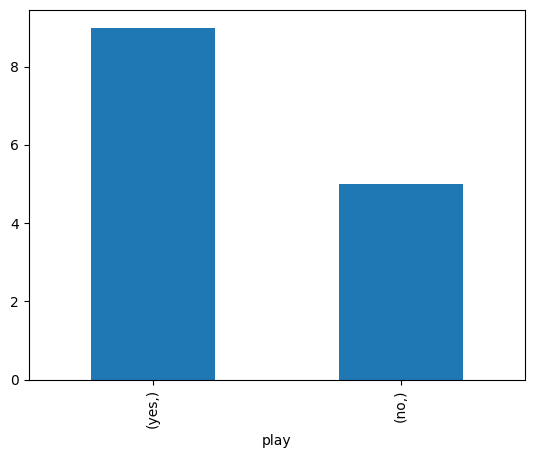

In [11]:
tennis_df[['play']].value_counts().plot.bar()

Let's try something fancy buy plotting all columns at the same time!

In [12]:
col_names = list(tennis_df.columns)
col_names

['outlook', 'temp', 'humidity', 'windy', 'play']

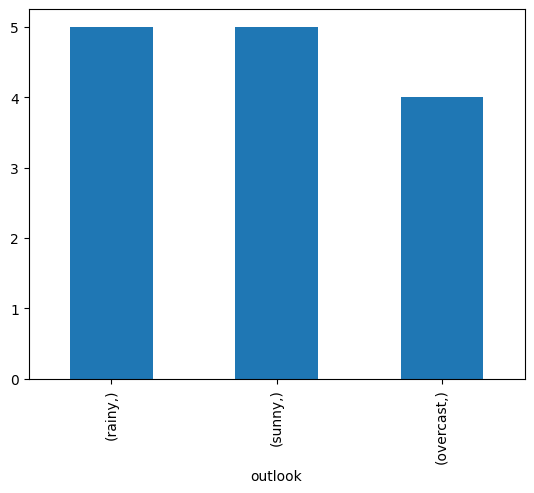

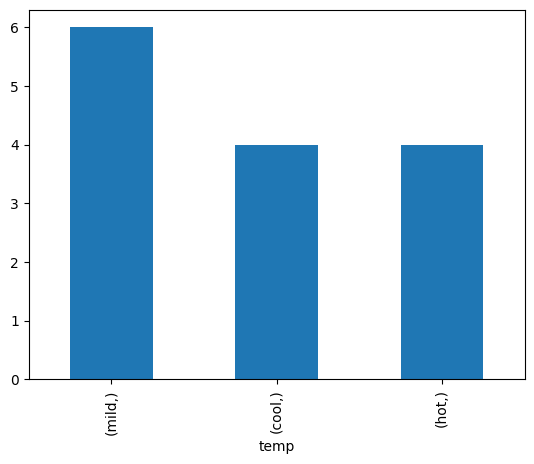

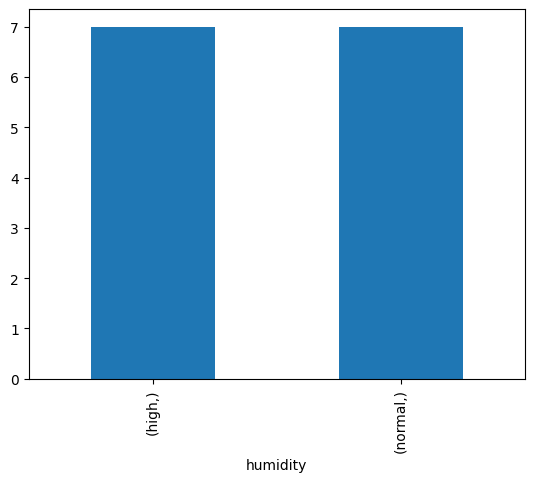

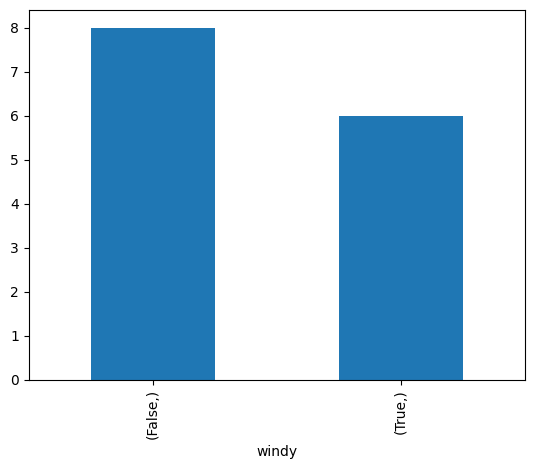

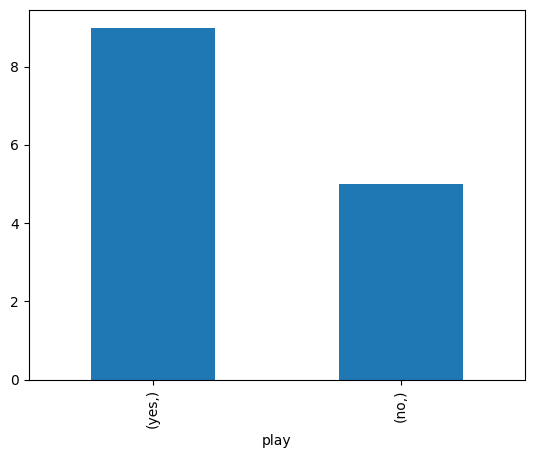

In [13]:
col_names = list(tennis_df.columns)
import matplotlib.pyplot as plot
for c in col_names:
    tennis_df[[c]].value_counts().plot.bar()
    plot.show() # we need this to force the display of a plot at each iteration

# Visualizing the Iris Data Set

Let’s try another data set that has a mix of categorical and numeric attributes:
* The *Iris* data set
* One of the most famous data sets in statistics/data science
* Describes three species of iris


In [14]:
iris = pandas.read_csv(home+'iris.csv')

In [15]:
iris.shape

(150, 6)

In [16]:
iris.head()

,id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


We have a mix of numeric and categorical attributes, get some descriptive statistics.


In [17]:
iris.describe()  # only deals with numerical variables!

,id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.057333,3.758000,1.199333
std,43.445368,0.828066,0.435866,1.765298,0.762238
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


We can also display histograms and density plots for each of the numeric attributes.


In [18]:
numvars = [ 'id', 'Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width']

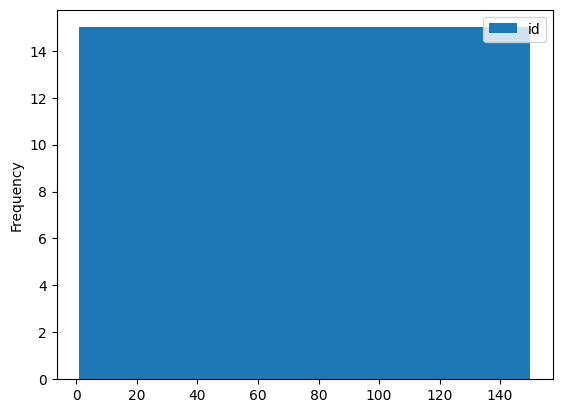

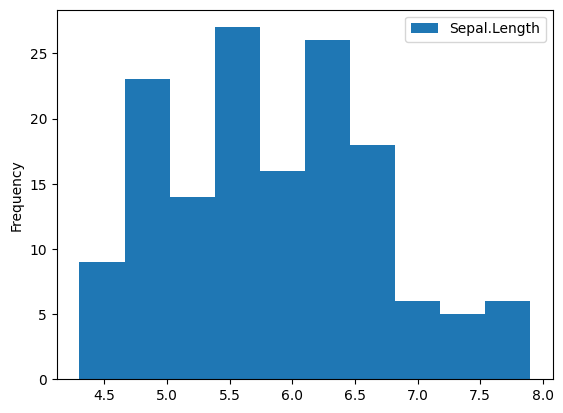

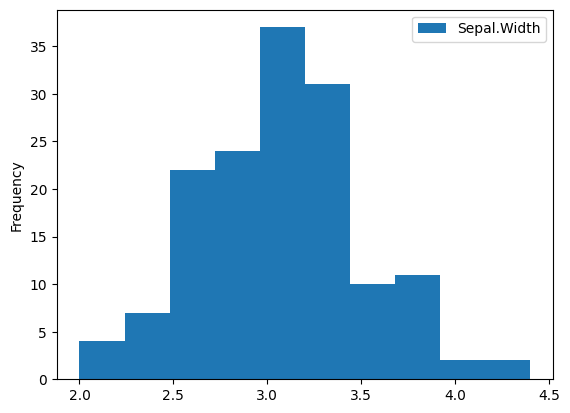

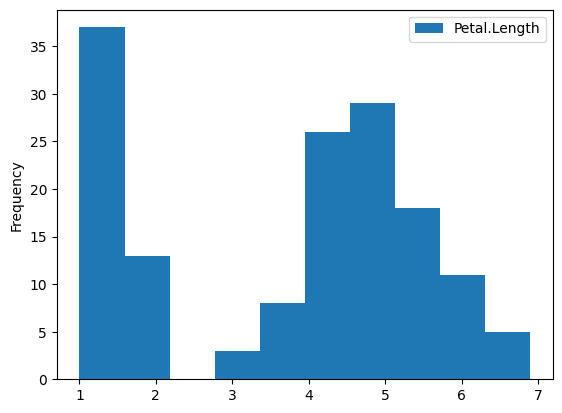

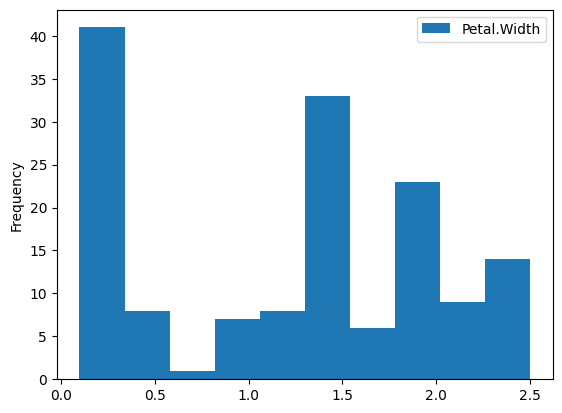

In [19]:
# using histograms
for v in numvars:
  iris[[v]].plot.hist()

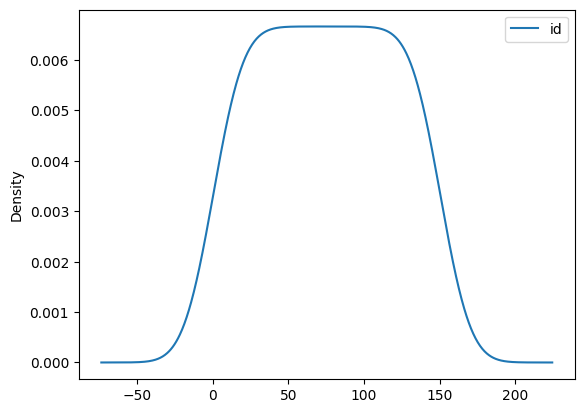

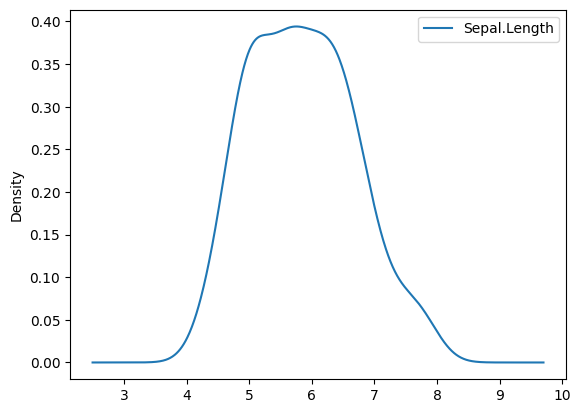

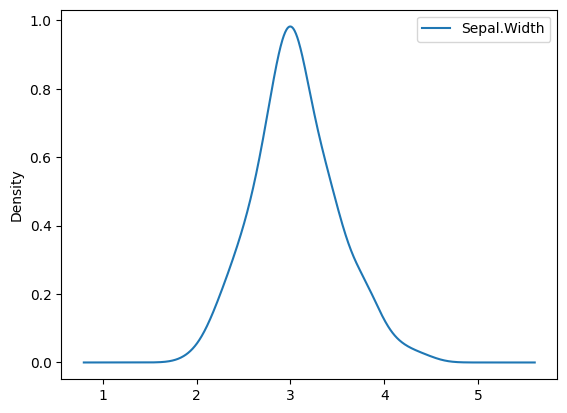

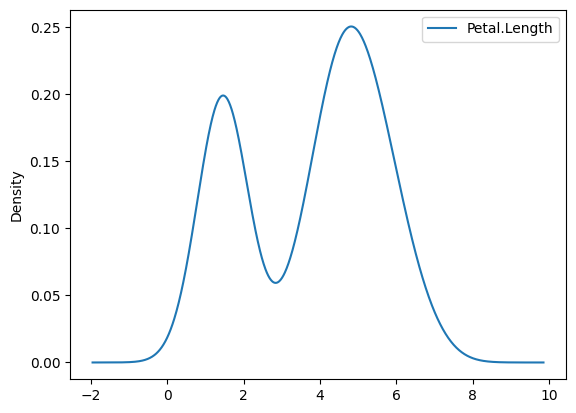

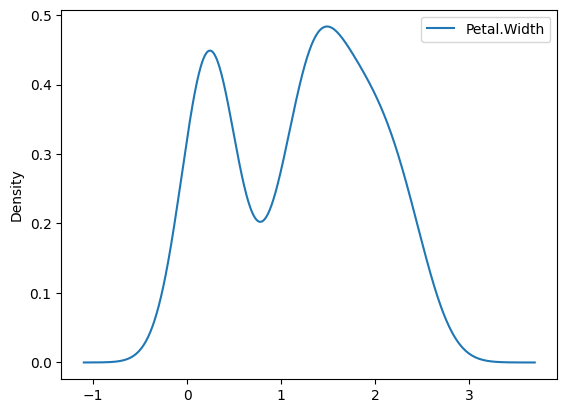

In [20]:
# using density plots
for v in numvars:
  iris[[v]].plot.kde()

* Histograms and density plots reveal the distribution of values.  
* Petal.Length and Petal.Width are multi-modal (more than one peak)
* Sepal.Length and Sepal.Width are more or less normally distributed.


# Distributions


<img src="https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/bimodal-distribution-2.png" height="350" width="400">

A multimodal distribution is a probability distribution with more than one peak, or “mode.”

* A distribution with one peak is called unimodal
* A distribution with two peaks is called bimodal
* A distribution with two peaks or more is multimodal

A bimodal distribution is also multimodal, as there are multiple peaks.

(source: http://www.statisticshowto.com/multimodal-distribution/)


The following is a multimodal density plot.

<img src="https://universeofdatascience.com/wp-content/uploads/2021/11/11-2048x1074.png" height="350" width="600">


# The Normal Distribution

A lot of data follows a **normal distribution**.  Let's take a look what governs the normal distribution.

First is the **mean** $\mu$ defined as,

$
\mu = \frac{1}{n} \sum_i^n x_i
$

given a data set defined as

$
\{x_1, x_2, x_3, \dots, x_n\}
$

Next, we have the **variance** $\sigma^2$ which is defined as the average squared distance of the points in a data set from the mean,

$
\sigma^2 = \frac{1}{n} \sum_i^n (x_i - \mu)^2
$

The variance measures how spread out a data set is.

Finally, we have the **standard deviation** $\sigma$ which is defined as the square root of the variance and as such relates the spread in data set directly to the distribution curve.  Here is the definition,

$
\sigma = \sqrt{\sigma^2} = \sqrt{\frac{1}{n} \sum_i^n (x_i - \mu)^2}
$

Here is how the standard deviation is related to the normal distribution,

<img src="https://upload.wikimedia.org/wikipedia/commons/a/a9/Empirical_Rule.PNG"  height="350" width="400">


For the **normal distribution**,

* Data points with values less than or equal to one standard deviation away from the mean account for 68.27% of the points in the dataset

* Data points with values less than or equal to two standard deviations from the mean account for 95.45%

* Data points with values less than or equal to three standard deviations from the mean account for 99.73%.



Therefore, data scientists often describe data points that are further than three standard deviations from the mean as **outliers** because they look differently than 99.73% of the data set.

Here are some distributions with the mean $\mu$ and the variance $\sigma^2$ as parameters,

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/800px-Normal_Distribution_PDF.svg.png"  height="350" width="400">

Notice that distributions with a small variance are "tighter" than distributions with a larger variance.  Also notice that distributions with different means are shifted on the x-axis.

([Wikipedia](https://en.wikipedia.org/wiki/Normal_distribution))

We have to look at the categorical attribute of the Iris data set separately.


In [21]:
iris.head()

,id,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [22]:
iris[['Species']].value_counts()

Species   
setosa        50
versicolor    50
virginica     50
dtype: int64

In [23]:
iris[['Species']].mode()

,Species
0,setosa
1,versicolor
2,virginica


All labels are equally represented -- the mode is all three labels!

# Transform

* The `id` column in the iris dataset does not add any information.  
* It assigns a unique number to each row of the table.
* We want to just drop this column from our dataset


<Axes: ylabel='Frequency'>

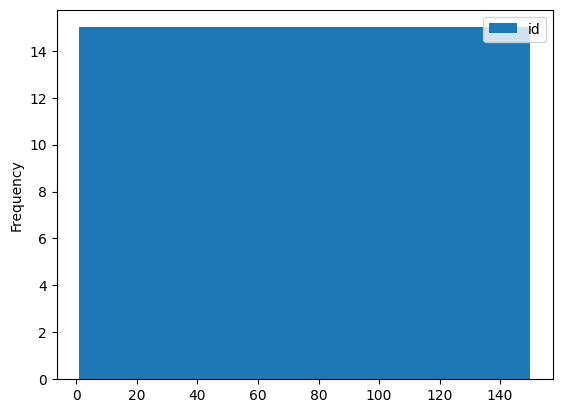

In [24]:
iris[['id']].plot.hist()

We use the drop function to drop the ‘id’ column.


In [25]:
iris.shape

(150, 6)

In [26]:
iris_new = iris.drop(columns=['id'])

In [27]:
iris_new.shape

(150, 5)

In [28]:
iris_new.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Looking at the *independent* variables.

array([[<Axes: title={'center': 'Sepal.Length'}>,
        <Axes: title={'center': 'Sepal.Width'}>],
       [<Axes: title={'center': 'Petal.Length'}>,
        <Axes: title={'center': 'Petal.Width'}>]], dtype=object)

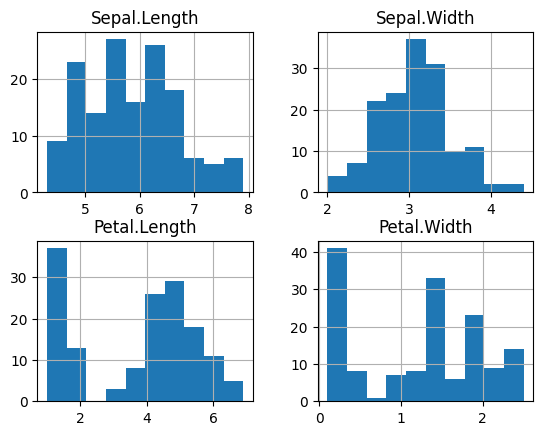

In [29]:
iris_new.hist()

![cheat sheet](https://raw.githubusercontent.com/lutzhamel/ds-assets/main/assets/PandasPythonForDataScience.jpg)

<a href="http://s3.amazonaws.com/assets.datacamp.com/blog_assets/PandasPythonForDataScience+(1).pdf">source</a>

# Reading

* [2.1 Understanding Data Types in Python](https://jakevdp.github.io/PythonDataScienceHandbook/02.01-understanding-data-types.html)
* [3.0 Data Manipulation with Pandas](https://jakevdp.github.io/PythonDataScienceHandbook/03.00-introduction-to-pandas.html)
* [3.1 Introducing Pandas Objects](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html)
* [4.0 Visualization with Matplotlib](https://jakevdp.github.io/PythonDataScienceHandbook/04.00-introduction-to-matplotlib.html)
* [4.2 Simple Scatter Plots](https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html)


# Project

See Brightspace for details.

